In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from imblearn.over_sampling import ADASYN

% matplotlib inline

In [2]:
# Load data
train_df = pd.read_csv("~/real_estate/data/v9/train_df.csv")

smote_features = train_df.columns[:-1]

In [3]:
scaled_target = (train_df["target"].values - min(train_df["target"]))/(
    max(train_df["target"]) - min(train_df["target"]))

target_groups = []

for i in scaled_target:
    target = int(np.floor(i*30))
    target_groups.append(target)

In [4]:
for i in range(31):
    print(i, len([j for j in target_groups if j == i]))

0 3
1 3
2 12
3 23
4 54
5 156
6 287
7 508
8 1012
9 1877
10 2336
11 2420
12 1927
13 1339
14 775
15 555
16 390
17 313
18 207
19 176
20 99
21 78
22 67
23 42
24 23
25 7
26 8
27 3
28 3
29 2
30 1


In [5]:
indices_first = [i for i, x in enumerate(target_groups) if x in [0,1]]
indices_last = [i for i, x in enumerate(target_groups) if x in [26,27,28,29,30]]

for i in indices_first:
    target_groups[i] = 2
for i in indices_last:
    target_groups[i] = 25

In [6]:
adasyn = ADASYN(n_neighbors=5, ratio="minority", random_state=42)
X_res, y_res = adasyn.fit_resample(train_df[smote_features].values, target_groups)

for i in range(20):
    X_res, y_res = adasyn.fit_resample(X_res, y_res)
    
X_res = pd.DataFrame(X_res, columns=smote_features)

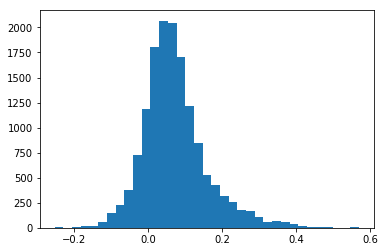

In [7]:
plt.hist(train_df["target"], bins=35)
plt.show()

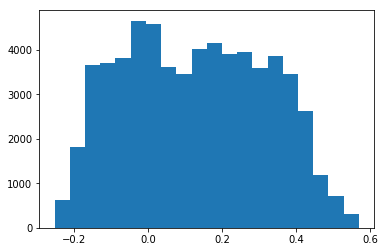

In [9]:
plt.hist(X_res["target"], bins=20)
plt.show()

In [10]:
X_res.to_csv("~/real_estate/data/v9/train_df_adasyn.csv", index=False)